# iperf3 Multi-NIC Performance Analysis

This notebook analyzes iperf3 performance data from multiple NICs with variable stream counts. It generates three types of visualizations:

1. **Individual Stream Analysis**: Shows all streams for each NIC separately
2. **NIC Throughput Comparison**: Compares total throughput per NIC
3. **Aggregate Performance**: Shows combined throughput across all NICs

## Data Generation

The iperf3 JSON results analyzed in this notebook are generated using the `gpu_to_gpu_node.sh` script, which runs iperf3 tests between two GPU nodes using SLURM. The script runs iperf3 tests on 4 NICs (hsn0-hsn3) with each process bound to the closest GPU and dedicated NIC on each node.

### Running the Data Collection Script

You can run the script in two ways:

**Option 1: Interactive Session**
```bash
# Request interactive allocation
salloc -q interactive -t 30 -A <account> -N 2 -C 'gpu'

# Run the script
./gpu_to_gpu_node.sh
```

**Option 2: Batch Job**
```bash
# Submit as batch job
sbatch -q debug -t 30 -A <account> -N 2 -C 'gpu' gpu_to_gpu_node.sh
```

### Output

The script creates a timestamped results directory:
```bash
iperf_results_YYYYMMDD_HHMMSS/
├── client_0_results.json  # NIC hsn0 results
├── client_1_results.json  # NIC hsn1 results  
├── client_2_results.json  # NIC hsn2 results
└── client_3_results.json  # NIC hsn3 results
```

## Configuration

Update the `results_dir` variable below to point to your iperf3 results directory.

## Results

Sever + Client output from `gpu_to_gpu_node.sh` showing each `iperf3` process was using the same numa domain as the NIC.
```bash
2: Starting server on interface: nid001148-hsn2 [HSN Device NUMA: 2 - CPU NUMA: 2]
1: Starting server on interface: nid001148-hsn1 [HSN Device NUMA: 1 - CPU NUMA: 1]
0: Starting server on interface: nid001148-hsn0 [HSN Device NUMA: 0 - CPU NUMA: 0]
3: Starting server on interface: nid001148-hsn3 [HSN Device NUMA: 3 - CPU NUMA: 3]
[INFO] 17:42:42 Servers initialized successfully
[INFO] 17:42:42 Starting 4 iperf3 clients on nid001149...
0: Client 0: nid001149-hsn0 -> nid001148-hsn0 [HSN Device NUMA: 0 - CPU NUMA: 0]
2: Client 2: nid001149-hsn2 -> nid001148-hsn2 [HSN Device NUMA: 2 - CPU NUMA: 2]
3: Client 3: nid001149-hsn3 -> nid001148-hsn3 [HSN Device NUMA: 3 - CPU NUMA: 3]
1: Client 1: nid001149-hsn1 -> nid001148-hsn1 [HSN Device NUMA: 1 - CPU NUMA: 1]
```

### 5 Minute test with x1 stream for each NIC.

In [9]:
import matplotlib.pyplot as plt
from pathlib import Path
from iperf_plot_util import (
    load_multiple_nic_data, extract_multi_nic_data,
    plot_all_streams_all_nics, plot_individual_nic_throughput,
    plot_total_combined_all_nics
)

# =============================================================================
# DATA LOADING
# =============================================================================

# Update this path to your iperf3 results directory
results_dir = 'iperf_results_20250811_173552'

# Load and process the data
print("Loading iperf3 data...")
nic_data = load_multiple_nic_data(results_dir)
multi_nic_results = extract_multi_nic_data(nic_data)

Loading iperf3 data...


## Plot 1: Individual Stream Analysis

This plot shows the throughput of each individual stream for every NIC.

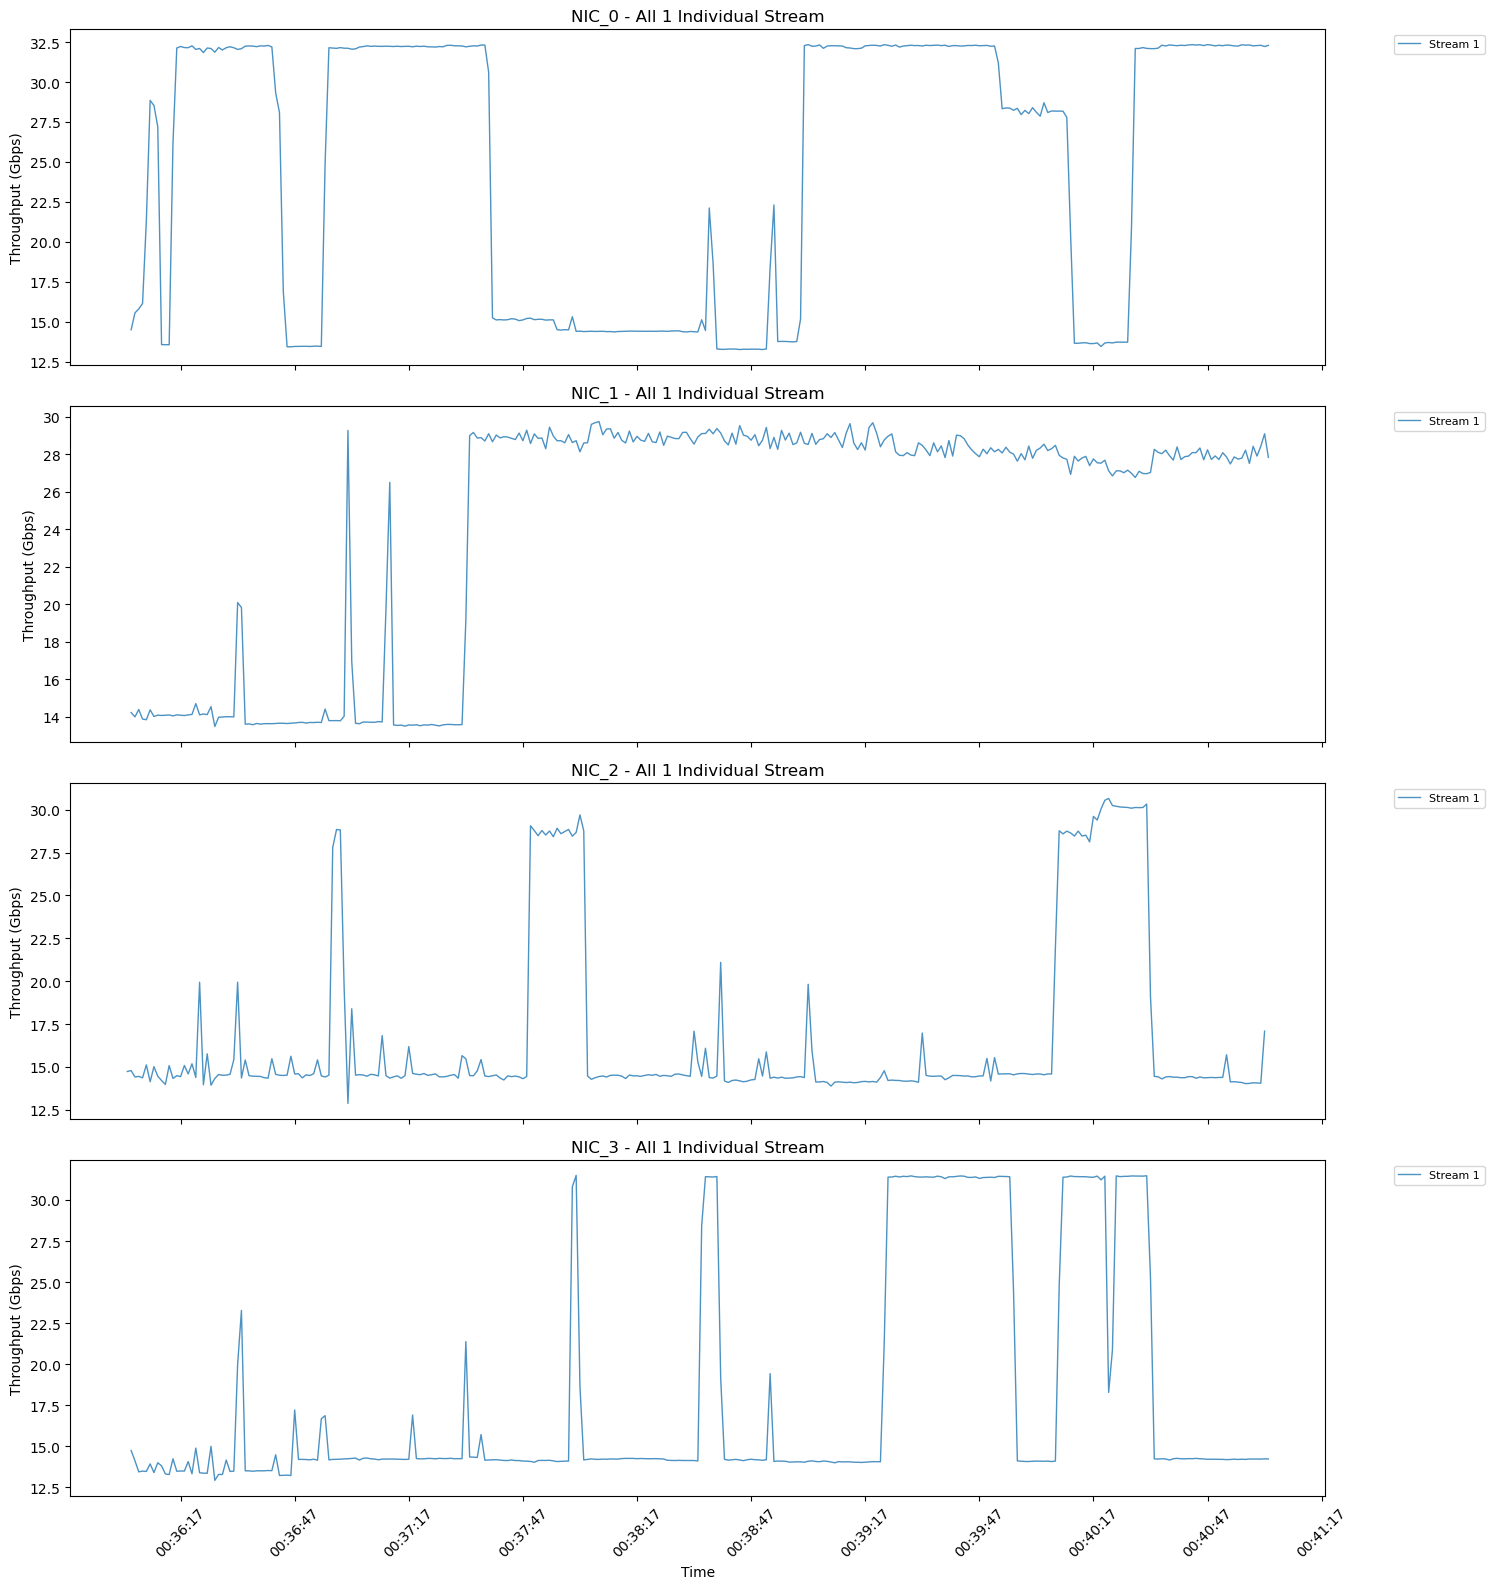

In [8]:
fig1 = plot_all_streams_all_nics(multi_nic_results)
# plt.savefig('plot1_individual_streams_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## Plot 2: NIC Throughput Comparison

This plot compares the total aggregated throughput for each NIC (derived from `interval['sum']['bits_per_second']`). 

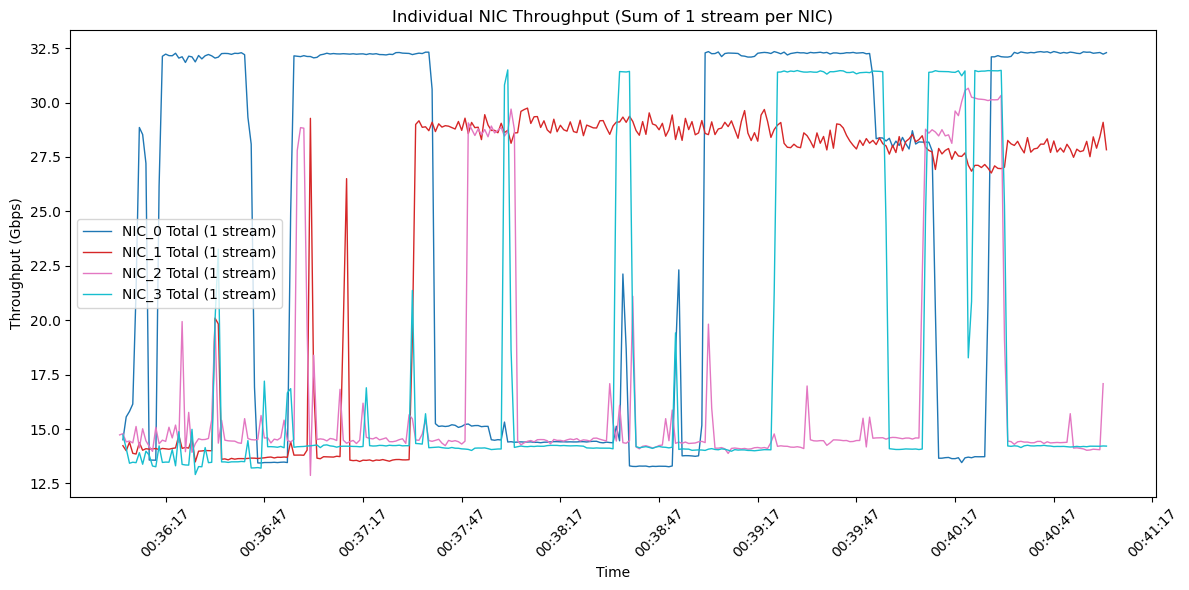

In [10]:
fig2 = plot_individual_nic_throughput(multi_nic_results)
# plt.savefig('plot2_nic_throughput_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Plot 3: Total Aggregate Performance

This plot shows the total combined throughput across all NICs with proper timestamp alignment.

**Note:** This requires scipy for proper timestamp alignment. If scipy is unavailable, it falls back to the NIC comparison plot.

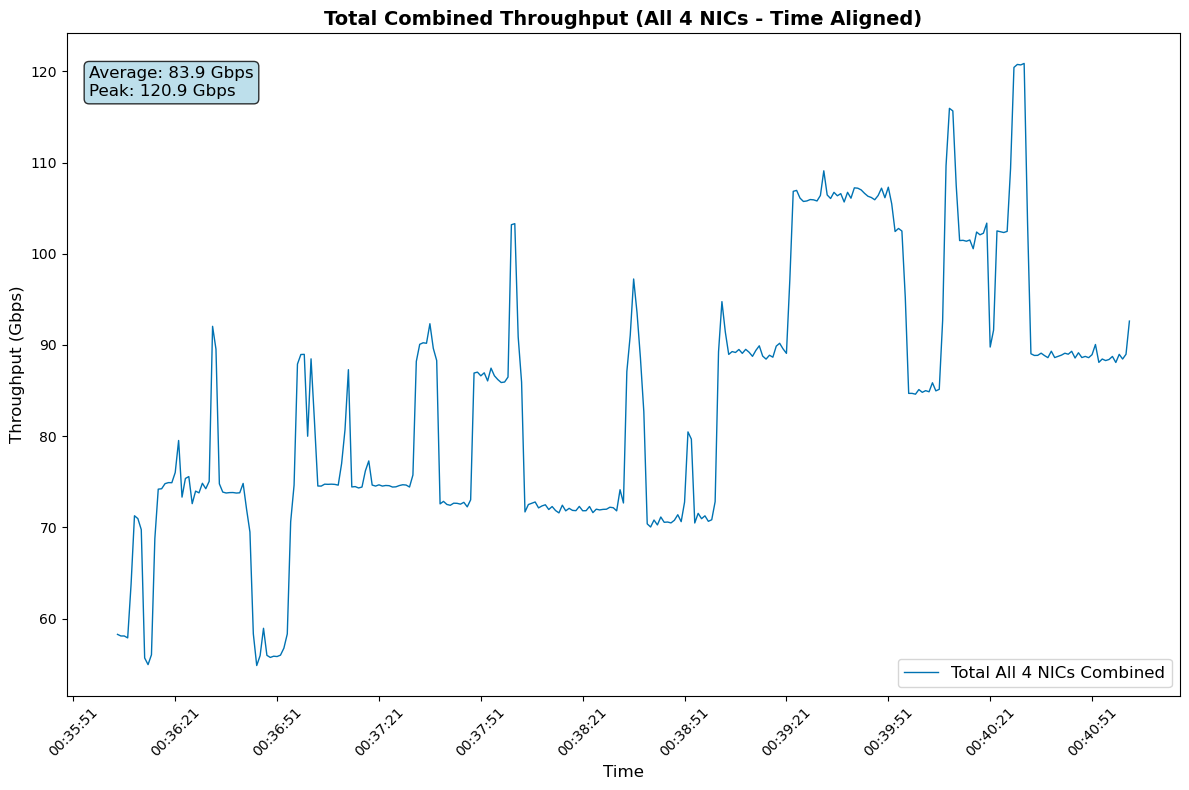

In [11]:
fig3 = plot_total_combined_all_nics(multi_nic_results)
# plt.savefig('plot3_total_aggregate_performance.png', dpi=300, bbox_inches='tight')
plt.show()


### 5 Minute test with x16 stream for each NIC.

In [13]:
import matplotlib.pyplot as plt
from pathlib import Path
from iperf_plot_util import (
    load_multiple_nic_data, extract_multi_nic_data,
    plot_all_streams_all_nics, plot_individual_nic_throughput,
    plot_total_combined_all_nics
)

# =============================================================================
# DATA LOADING
# =============================================================================

# Update this path to your iperf3 results directory
results_dir = 'iperf_results_20250811_174232'

# Load and process the data
print("Loading iperf3 data...")
nic_data = load_multiple_nic_data(results_dir)
multi_nic_results = extract_multi_nic_data(nic_data)

Loading iperf3 data...


## Plot 1: Individual Stream Analysis

This plot shows the throughput of each individual stream for every NIC.

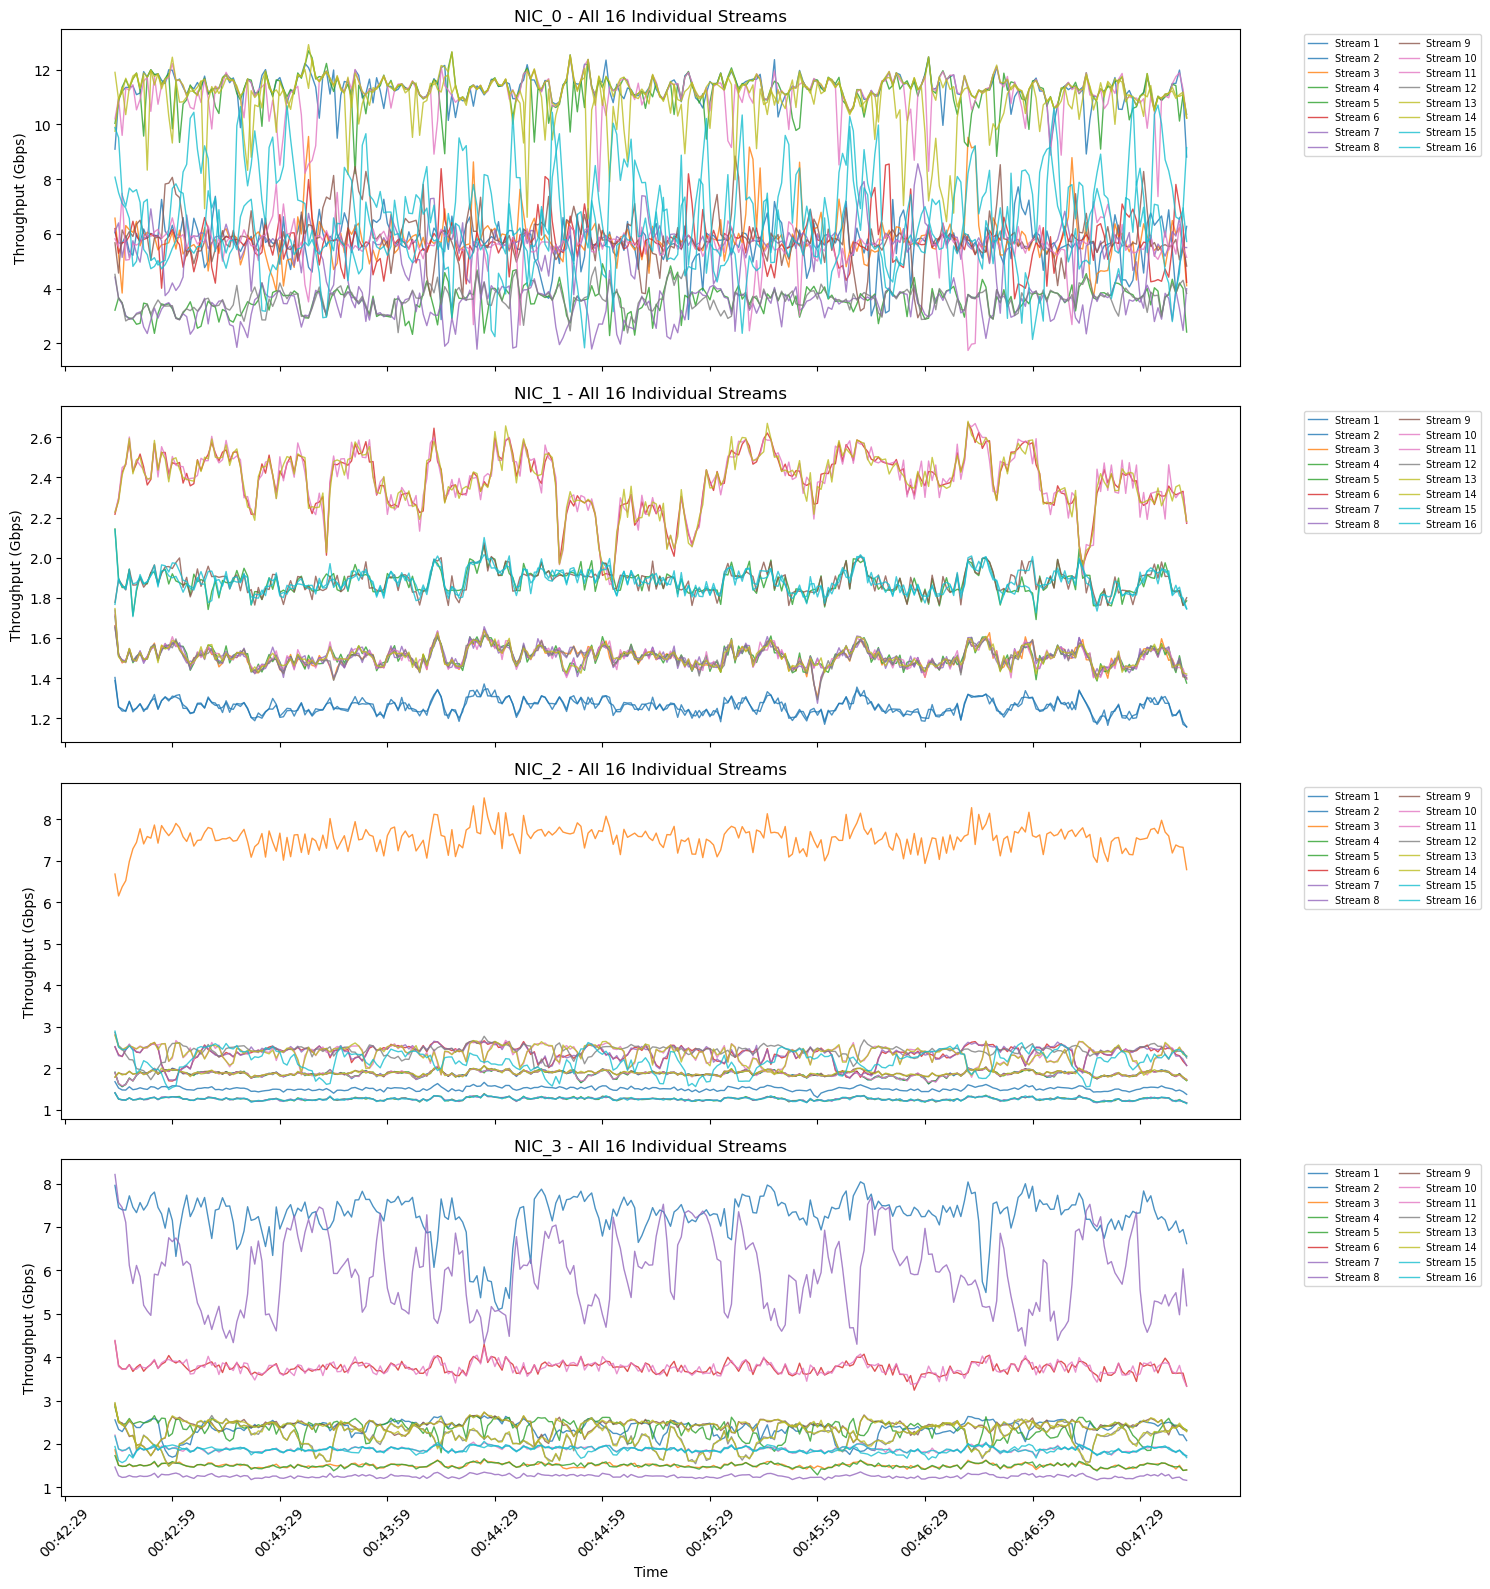

In [14]:
fig1 = plot_all_streams_all_nics(multi_nic_results)
# plt.savefig('plot1_individual_streams_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## Plot 2: NIC Throughput Comparison

This plot compares the total aggregated throughput for each NIC (derived from `interval['sum']['bits_per_second']`). 

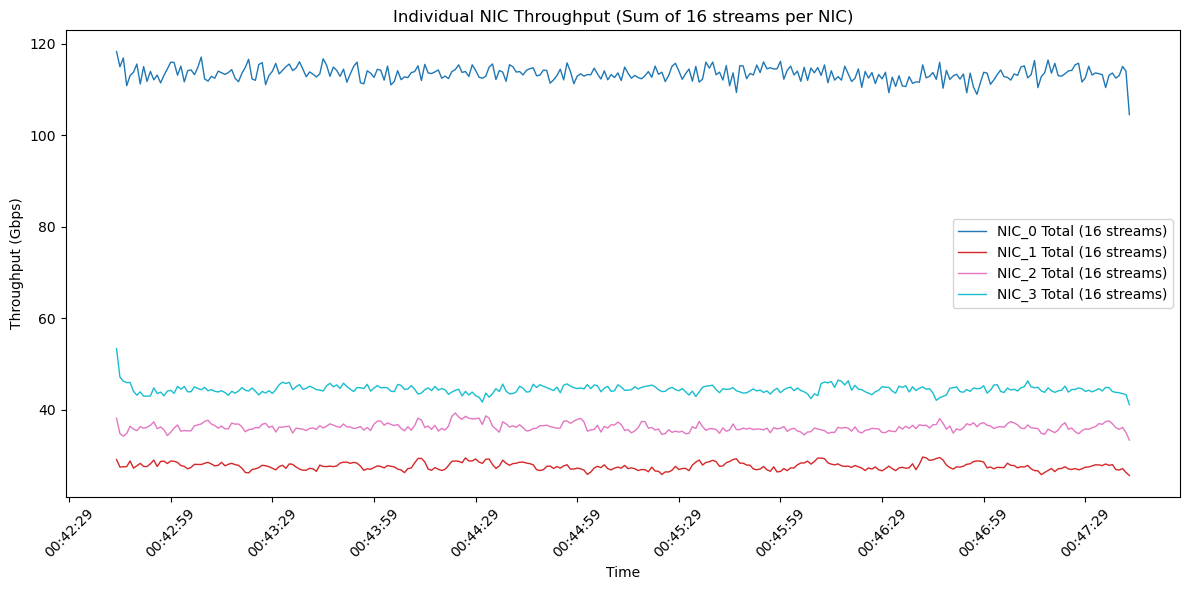

In [15]:
fig2 = plot_individual_nic_throughput(multi_nic_results)
# plt.savefig('plot2_nic_throughput_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Plot 3: Total Aggregate Performance

This plot shows the total combined throughput across all NICs with proper timestamp alignment.

**Note:** This requires scipy for proper timestamp alignment. If scipy is unavailable, it falls back to the NIC comparison plot.

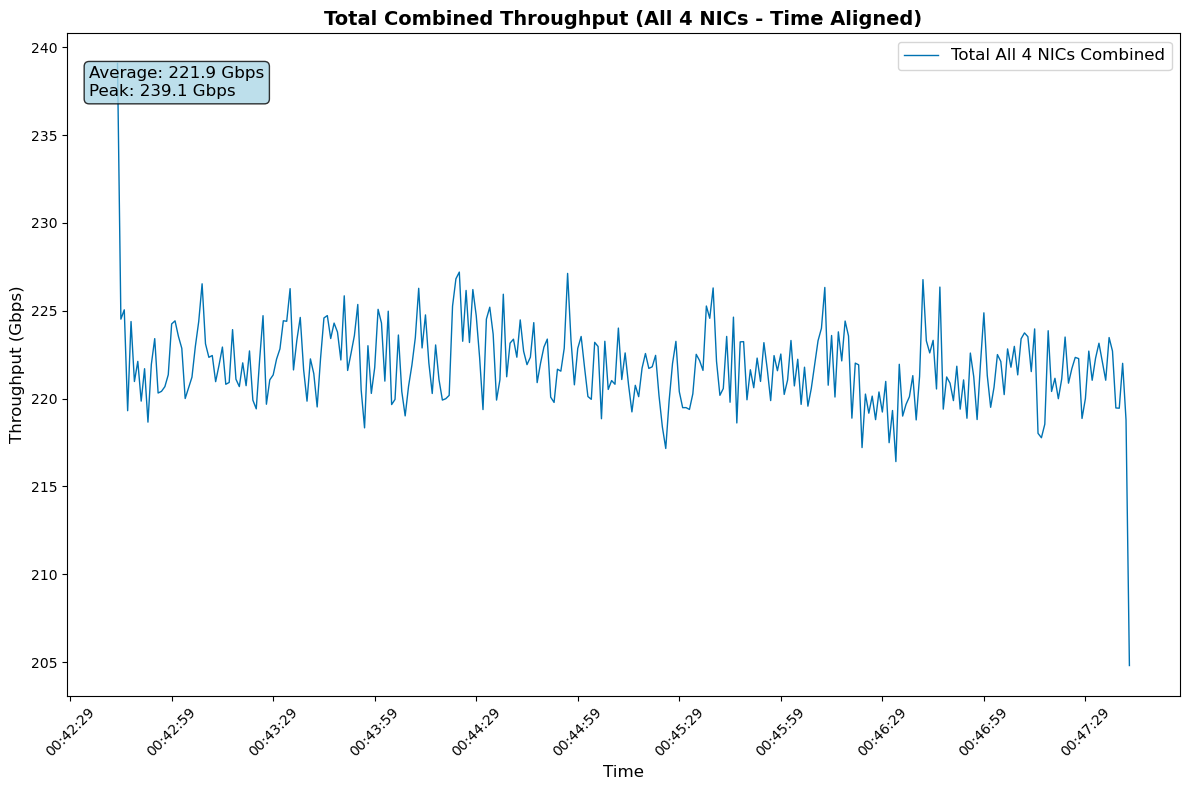

In [16]:
fig3 = plot_total_combined_all_nics(multi_nic_results)
# plt.savefig('plot3_total_aggregate_performance.png', dpi=300, bbox_inches='tight')
plt.show()
